#Data loading and Preparation

In [6]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [7]:
#Loading data
path = '/content/4A_cleaned_8_.xlsx'
data =pd.read_excel(path)
data.head(2)

,IP NUMBER,UNIT,SEX,AGE,MARITAL STATUS,RELIGION,DISTRICT OF RESIDENCE,REGION,WORKING DIAGNOSIS,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,TB_type,NUMBER OF PREVIOUS ADMISSIONS,DAY OF ADMISSION,MONTH OF ADMISSION,YEAR OF ADMISSION,DURATION,OUT COME
0,1861416,GI,M,30,2,COU,Nakasongola,CENTRAL,"ISS,Abdominal TB,,","ISS,,",1,Abdominal_TB,5,Tuesday,November,2010,6,IMPROVED
1,1868011,GI,F,46,2,COU,Kampala,CENTRAL,"ISS Stage I&II,Disseminated TB,,","ISS Stage I&II,,",1,Disseminated TB,3,Monday,December,2010,4,IMPROVED


In [8]:
data['TB_type'].unique()

array(['Abdominal_TB', 'Disseminated TB', 'PTB', 'Other TBs', 'CNS_TB',
       'TB iris'], dtype=object)

##**Preparing data**

In [9]:
data.dropna(subset=['NUMBER OF PREVIOUS ADMISSIONS'], inplace=True)
data.dropna(subset=['IP NUMBER'], inplace=True)

data = data[data['IP NUMBER']  != 'a' ]
data = data[data['IP NUMBER']  != 'vf' ]

In [10]:
data.shape

(4029, 18)

In [11]:
#data.to_excel('final_cleaned_TB-4a.xlsx', index=False)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4029 entries, 0 to 4028
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   IP NUMBER                               4029 non-null   object
 1   UNIT                                    4029 non-null   object
 2   SEX                                     4029 non-null   object
 3   AGE                                     4029 non-null   int64 
 4   MARITAL STATUS                          4026 non-null   object
 5   RELIGION                                4029 non-null   object
 6   DISTRICT OF RESIDENCE                   4029 non-null   object
 7   REGION                                  4029 non-null   object
 8   WORKING DIAGNOSIS                       4029 non-null   object
 9   ADDITIONAL WORKING DIAGNOSIS            3849 non-null   object
 10  NUMBER OF ADDITIONAL WORKING DIAGNOSIS  4029 non-null   int64 
 11  TB_t

In [13]:
#filtering out only patients with "DIED" outcome
data = data[data['OUT COME'] == 'DIED']

In [14]:
#Deleting features which are not going to be used
features_to_remove = ['IP NUMBER', 'UNIT','YEAR OF ADMISSION','DISTRICT OF RESIDENCE','WORKING DIAGNOSIS' ,'ADDITIONAL WORKING DIAGNOSIS',
                'MARITAL STATUS']
data = data.drop(columns = features_to_remove)

In [15]:

non_features = ['OUT COME']
data1 = data.drop(columns=non_features)

#**Data Preprocessing**

##Cleaning and filtering

In [16]:
#filtering out only patients with "DIED" outcome
data = data[data['OUT COME'] == 'DIED']

In [17]:
#data['YEAR OF ADMISSION'] = data['YEAR OF ADMISSION'].astype(str)

In [18]:
#Encoding categorical features
non_features = ['DURATION', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS','AGE','NUMBER OF PREVIOUS ADMISSIONS']
data1 = data.drop(columns=non_features)

text_columns = data1.select_dtypes(include=['object']).columns

data2 = pd.get_dummies(data, columns=text_columns)

In [19]:
data2['NUMBER OF PREVIOUS ADMISSIONS'].unique()

array([ 2,  4,  5,  1,  7,  6,  9, 20, 11, 13,  3,  8, 15, 14, 10, 18, 16,
       22, 21, 25, 12, 26, 23, 92,  0])

In [20]:
data2['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'] = data2['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'].astype(float)
data2['AGE'] = data2['AGE'].astype(float)

In [21]:
data2.sample(4)

,AGE,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,NUMBER OF PREVIOUS ADMISSIONS,DURATION,SEX_F,SEX_M,RELIGION_CATHOLIC,RELIGION_COU,RELIGION_ISLAM,RELIGION_OTHERS,...,MONTH OF ADMISSION_February,MONTH OF ADMISSION_January,MONTH OF ADMISSION_July,MONTH OF ADMISSION_June,MONTH OF ADMISSION_March,MONTH OF ADMISSION_May,MONTH OF ADMISSION_November,MONTH OF ADMISSION_October,MONTH OF ADMISSION_September,OUT COME_DIED
1001,24.0,2.0,0,4,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1999,49.0,1.0,0,10,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3420,35.0,1.0,0,5,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1209,59.0,1.0,0,2,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 5 to 4025
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   AGE                                     1289 non-null   float64
 1   NUMBER OF ADDITIONAL WORKING DIAGNOSIS  1289 non-null   float64
 2   NUMBER OF PREVIOUS ADMISSIONS           1289 non-null   int64  
 3   DURATION                                1289 non-null   int64  
 4   SEX_F                                   1289 non-null   uint8  
 5   SEX_M                                   1289 non-null   uint8  
 6   RELIGION_CATHOLIC                       1289 non-null   uint8  
 7   RELIGION_COU                            1289 non-null   uint8  
 8   RELIGION_ISLAM                          1289 non-null   uint8  
 9   RELIGION_OTHERS                         1289 non-null   uint8  
 10  RELIGION_PENTECOSTAL                    1289 non-null   uint

AGE
Skewness of: 0.9496632846993347


<ipython-input-23-295a527e9a52>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


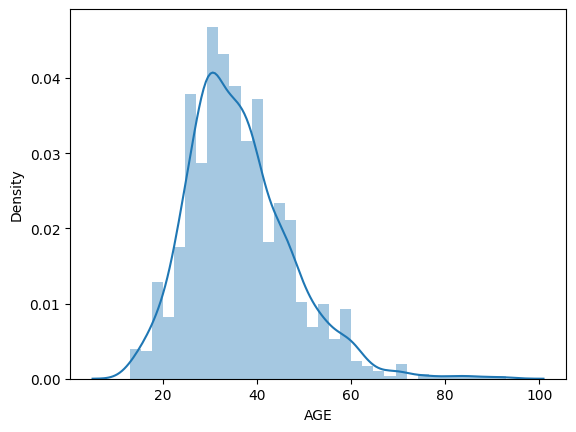

NUMBER OF PREVIOUS ADMISSIONS
Skewness of: 9.753179046520078


<ipython-input-23-295a527e9a52>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


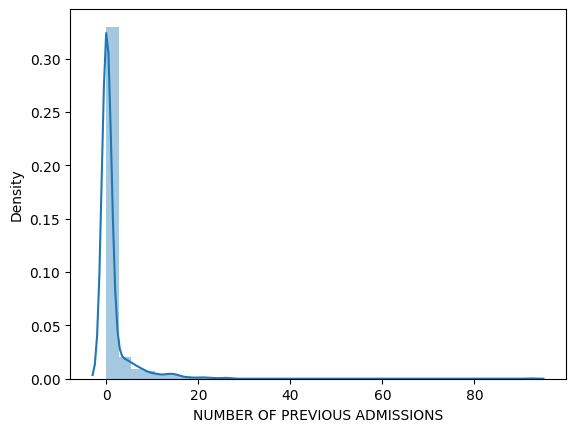

NUMBER OF ADDITIONAL WORKING DIAGNOSIS
Skewness of: 0.4788406731096686


<ipython-input-23-295a527e9a52>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


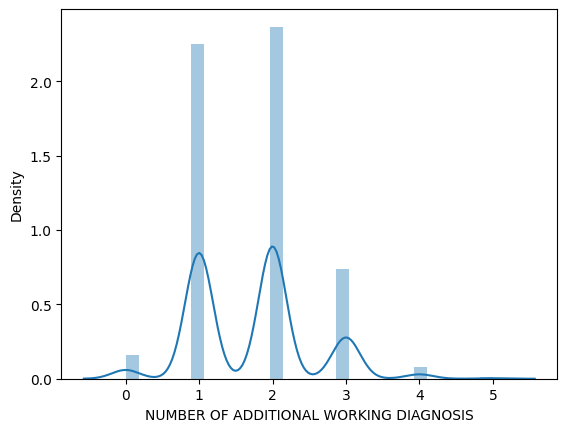

DURATION
Skewness of: 1.4126507630182499


<ipython-input-23-295a527e9a52>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


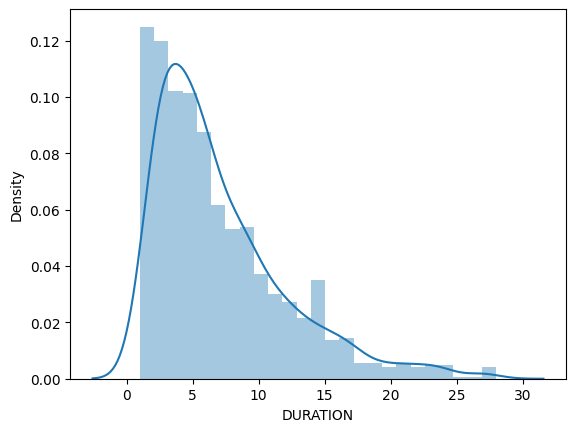

In [23]:
from scipy.stats import skew
import seaborn as sns

#Visualizing skeness of the continuous features
continuous_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS','DURATION']
for col in continuous_features:
  print(col)
  print(f"Skewness of: {skew(data2[col])}")

  plt.figure()
  sns.distplot(data2[col])
  plt.show()

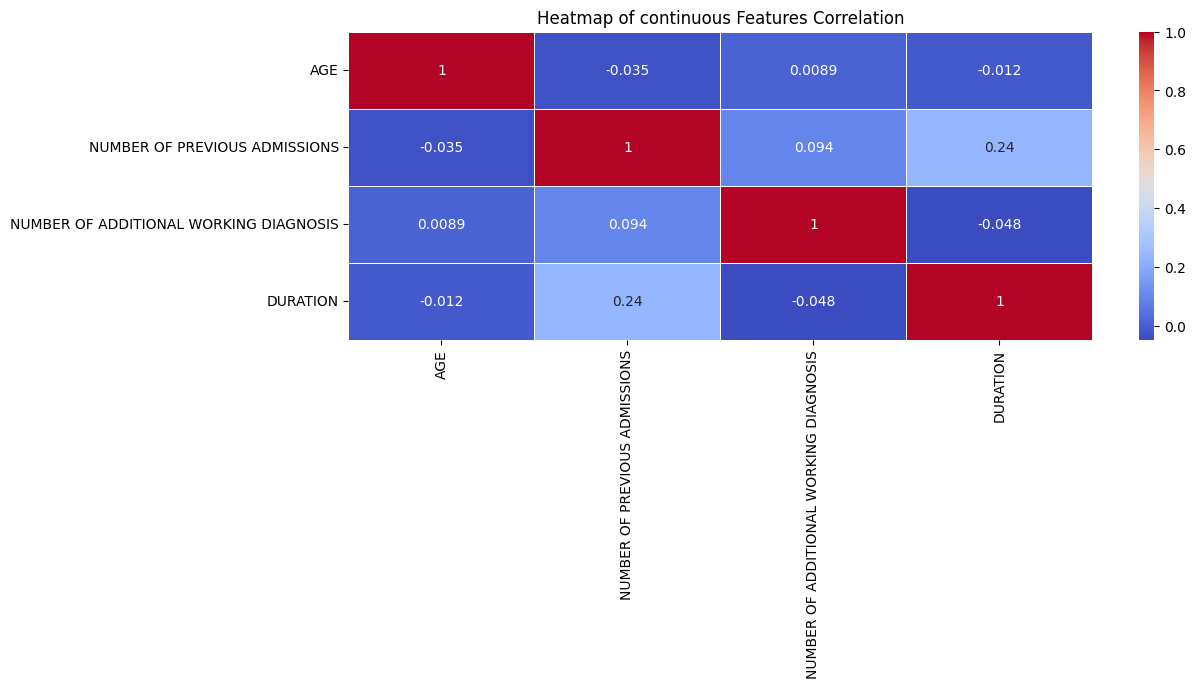

In [24]:
#Visualizing Correlation among the continuous features nluding the target
continuous_features_target = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'DURATION']
plt.figure(figsize=(12,4))
sns.heatmap(data2[continuous_features_target].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of continuous Features Correlation')
plt.show()

##Transforming features and target

In [25]:
#Transforming the continuous features
transform_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS']
for col in transform_features:
  data2[col] = np.log1p(data2[col])

#Second transformation
data2['NUMBER OF PREVIOUS ADMISSIONS'] = np.log1p(data2['NUMBER OF PREVIOUS ADMISSIONS'])


In [26]:
data['DURATION'].unique()

array([ 3,  5,  6,  2,  8,  9, 21, 11,  7,  1, 13, 15, 16,  4, 18, 12, 17,
       10, 14, 23, 19, 27, 24, 22, 25, 26, 28, 20])

Skewness: -0.12857781931516665


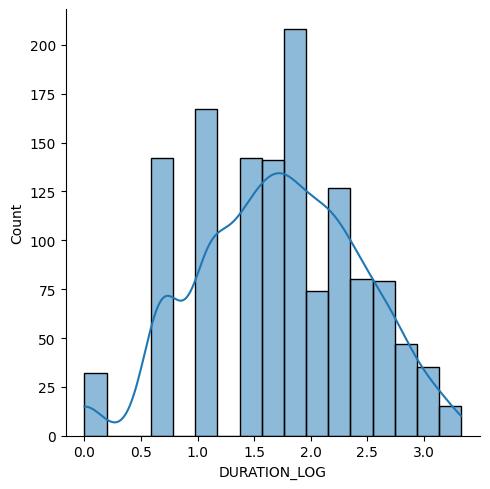

In [27]:
#Skewness and density plot
data2['DURATION_LOG'] = np.log(data2['DURATION'])
skewness = skew(data2['DURATION_LOG'], nan_policy='omit')
print(f"Skewness: {skewness}")
sns.displot(data2['DURATION_LOG'], kde=True)  # kde=True adds a kernel density estimate
plt.show()

In [28]:
data2['DURATION_LOG'].unique()

array([1.09861229, 1.60943791, 1.79175947, 0.69314718, 2.07944154,
       2.19722458, 3.04452244, 2.39789527, 1.94591015, 0.        ,
       2.56494936, 2.7080502 , 2.77258872, 1.38629436, 2.89037176,
       2.48490665, 2.83321334, 2.30258509, 2.63905733, 3.13549422,
       2.94443898, 3.29583687, 3.17805383, 3.09104245, 3.21887582,
       3.25809654, 3.33220451, 2.99573227])

In [29]:
# data2 = data2.replace([np.inf, -np.inf], np.nan)
# data2 = data2.dropna()


In [30]:
print("Infinite Values:", np.isinf(data2['DURATION_LOG']).any())


Infinite Values: False


In [31]:
print(data2['DURATION_LOG'].dtype)

float64


In [32]:
data2['DURATION_LOG'].astype(int)

5       1
6       1
9       1
10      0
12      2
       ..
4014    1
4015    1
4016    1
4021    2
4025    1
Name: DURATION_LOG, Length: 1289, dtype: int64

##Normalization and Visualization

In [33]:
#Normalizing and Standardizing continuous features
normalise_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS']
scaler = MinMaxScaler()
data2[normalise_features] = scaler.fit_transform(data2[normalise_features])


<function matplotlib.pyplot.show(close=None, block=None)>

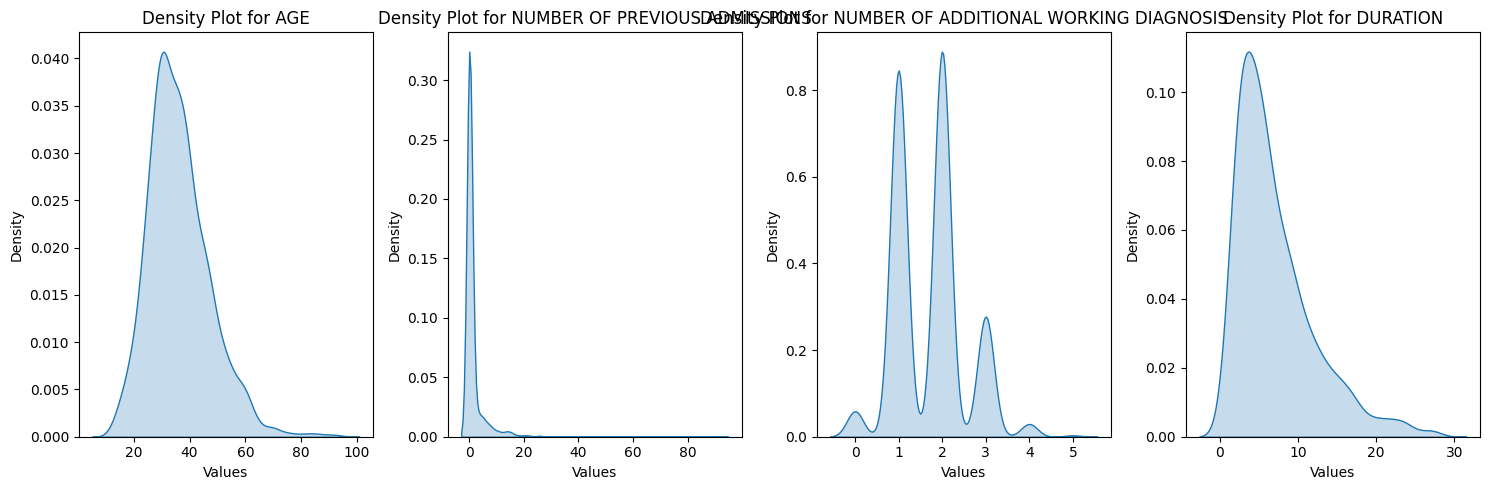

In [34]:
#Plotting Density plot
import seaborn as sns

continuous_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS','DURATION']

fig, axes = plt.subplots(1, len(continuous_features), figsize=(15, 5))

for i, col in enumerate(continuous_features):
  sns.kdeplot(data[col], fill=True,ax=axes[i])
  axes[i].set_title(f'Density Plot for {col}')
  axes[i].set_xlabel('Values')
  axes[i].set_ylabel('Density')
# plt.figure(figsize=(8,9))
# plt.bar(data['AGE'])
plt.tight_layout()
plt.show

In [35]:
data2.head(2)

,AGE,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,NUMBER OF PREVIOUS ADMISSIONS,DURATION,SEX_F,SEX_M,RELIGION_CATHOLIC,RELIGION_COU,RELIGION_ISLAM,RELIGION_OTHERS,...,MONTH OF ADMISSION_January,MONTH OF ADMISSION_July,MONTH OF ADMISSION_June,MONTH OF ADMISSION_March,MONTH OF ADMISSION_May,MONTH OF ADMISSION_November,MONTH OF ADMISSION_October,MONTH OF ADMISSION_September,OUT COME_DIED,DURATION_LOG
5,0.304489,0.386853,0.433328,3,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1.098612
6,0.160370,0.613147,0.560682,5,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1.609438


In [36]:
data2['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'].unique()

array([0.38685281, 0.61314719, 0.77370561, 1.        , 0.8982444 ,
       0.        ])

In [37]:
data2.shape

(1289, 43)

In [38]:
#Saving Preprocced data
#data.to_excel('preprocessed1_TB-4a.xlsx', index=False)

In [39]:
#extracting features and targets

X = data2.drop(columns=['DURATION','DURATION_LOG']).values
y = data2['DURATION_LOG'].values

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [40]:
print(X.shape)

(1289, 41)


#Model

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
torch.manual_seed(42)


In [42]:
# Converting data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [43]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(41, 10)
        self.fc2 = nn.Linear(10, 6)
        self.fc3 = nn.Linear(6, 3)
        self.fc4 = nn.Linear(3, 1)
        self.theta = nn.Parameter(torch.tensor(0.1, requires_grad=True))  # Learnable theta parameter

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [44]:
# Custom loss function
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, y_pred, y_true, theta):
        loss = theta * torch.abs(y_true - y_pred)
        return torch.mean(loss)

In [45]:

# Create an instance of your model
model = MyModel()

# Compile the model with Adam optimizer
adam_optimizer = optim.Adam(model.parameters(), lr=0.001)
custom_loss_fn = CustomLoss()



def train_with_adam_and_validation(optimizer, model, custom_loss_fn, theta, x, y, x_val, y_val):
  train_losses = []
  val_losses = []
  for epoch in range(1000):
      optimizer.zero_grad()
      y_pred = model(x)
      loss = custom_loss_fn(y_pred, y, theta)
      loss.backward()

      # Apply gradient clipping
      nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)

      optimizer.step()
      train_loss = loss.item()

      # Validation
      model.eval()
      with torch.no_grad():
          y_pred_val = model(x_val)
          val_loss = custom_loss_fn(y_pred_val, y_val, theta)
      model.train()

      print(f'Epoch {epoch+1}, Adam Loss: {train_loss}, Validation Loss: {val_loss}')

      train_losses.append(train_loss)
      val_losses.append(val_loss)

  # Plot training and validation curves
  plt.figure(figsize=(10, 5))
  plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
  plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.title('Training and Validation Curves')
  plt.show()



Epoch 1, Adam Loss: 0.1815056949853897, Validation Loss: 0.17891055345535278
Epoch 2, Adam Loss: 0.1793985515832901, Validation Loss: 0.17682059109210968
Epoch 3, Adam Loss: 0.17730365693569183, Validation Loss: 0.1747438907623291
Epoch 4, Adam Loss: 0.17521972954273224, Validation Loss: 0.17267775535583496
Epoch 5, Adam Loss: 0.1731477528810501, Validation Loss: 0.17062215507030487
Epoch 6, Adam Loss: 0.17108717560768127, Validation Loss: 0.16857610642910004
Epoch 7, Adam Loss: 0.16903825104236603, Validation Loss: 0.1665404736995697
Epoch 8, Adam Loss: 0.1669994741678238, Validation Loss: 0.16451506316661835
Epoch 9, Adam Loss: 0.16497044265270233, Validation Loss: 0.1624983847141266
Epoch 10, Adam Loss: 0.1629505157470703, Validation Loss: 0.16048990190029144
Epoch 11, Adam Loss: 0.16093923151493073, Validation Loss: 0.15849024057388306
Epoch 12, Adam Loss: 0.15893667936325073, Validation Loss: 0.15649913251399994
Epoch 13, Adam Loss: 0.1569422483444214, Validation Loss: 0.154516026

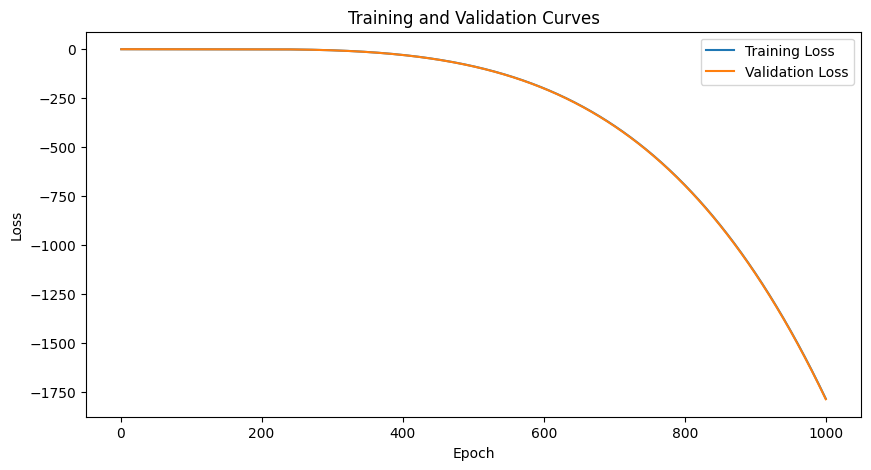

In [46]:
# Training with Adam optimizer and validation
train_with_adam_and_validation(adam_optimizer, model, custom_loss_fn, model.theta, X_train, y_train, X_test, y_test)